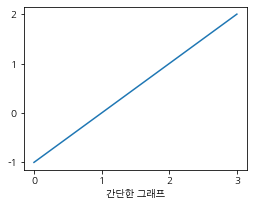

In [1]:
# 그래프 테스트
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.rc('font', size=16)  
plt.show()

In [2]:
#2022-06-15 ~ 2023-01-11 까지 몸무게 증량 운동기록(하체) 불러오기
df = pd.read_csv('csv\Lower_body.csv')

# 데이터타입, 결측치, 데이터 요약, 이상치 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 48 non-null     int64  
 1   DateTime           48 non-null     object 
 2   Weight(kg)         48 non-null     float64
 3   Squat(kg)          48 non-null     float64
 4   Sumo_deadlift(kg)  48 non-null     float64
 5   Rest_Period(day)   48 non-null     int64  
 6   Workout_time       48 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 2.8+ KB


,ID,Weight(kg),Squat(kg),Sumo_deadlift(kg),Rest_Period(day),Workout_time
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000
mean,23.50,72.760417,139.900000,160.283333,4.062500,1.270833
std,14.00,3.518749,15.049719,16.683389,2.453016,0.791970
min,0.00,66.300000,100.000000,120.000000,1.000000,0.000000
25%,11.75,70.350000,134.100000,152.125000,3.000000,1.000000
50%,23.50,71.750000,141.700000,162.000000,3.000000,1.000000
75%,35.25,75.600000,150.250000,173.125000,4.250000,2.000000
max,47.00,79.500000,163.000000,189.000000,14.000000,2.000000


In [3]:
# DateTime 형변환
df['DateTime'] = df['DateTime'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 48 non-null     int64         
 1   DateTime           48 non-null     datetime64[ns]
 2   Weight(kg)         48 non-null     float64       
 3   Squat(kg)          48 non-null     float64       
 4   Sumo_deadlift(kg)  48 non-null     float64       
 5   Rest_Period(day)   48 non-null     int64         
 6   Workout_time       48 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 2.8 KB


In [4]:
# 체중 대비 스쿼트, 데드리프트 중량을 알아보기 위한 컬럼 만들기
df['Squat_Weight_per_kg'] =   df['Squat(kg)'] / df['Weight(kg)']
df['Deadlift_Weight_per_kg'] = df['Sumo_deadlift(kg)'] / df['Weight(kg)']

#소수 둘째자리까지 출력
df['Squat_Weight_per_kg'] = df['Squat_Weight_per_kg'].round(2)
df['Deadlift_Weight_per_kg'] = df['Deadlift_Weight_per_kg'].round(2)
df.head()

,ID,DateTime,Weight(kg),Squat(kg),Sumo_deadlift(kg),Rest_Period(day),Workout_time,Squat_Weight_per_kg,Deadlift_Weight_per_kg
0,0,2022-06-15,66.3,100.0,120.0,2,0,1.51,1.81
1,1,2022-06-19,66.8,100.0,120.0,3,0,1.50,1.80
2,2,2022-06-26,67.1,108.5,128.0,3,2,1.62,1.91
3,3,2022-07-03,68.0,112.5,132.0,3,2,1.65,1.94
4,4,2022-07-10,68.7,120.0,136.0,3,1,1.75,1.98


In [5]:
# 스쿼트 중량 순으로 정렬
df.sort_values('Squat(kg)', ascending=False).head(3)

,ID,DateTime,Weight(kg),Squat(kg),Sumo_deadlift(kg),Rest_Period(day),Workout_time,Squat_Weight_per_kg,Deadlift_Weight_per_kg
25,25,2023-01-24,76.0,163.0,185.0,2,2,2.14,2.43
20,20,2022-12-18,78.7,161.0,172.5,4,1,2.05,2.19
24,24,2023-01-19,75.3,159.0,170.0,5,2,2.11,2.26


In [6]:
# 데드리프트 중량 순으로 정렬
df.sort_values('Sumo_deadlift(kg)', ascending=False).head(3)

,ID,DateTime,Weight(kg),Squat(kg),Sumo_deadlift(kg),Rest_Period(day),Workout_time,Squat_Weight_per_kg,Deadlift_Weight_per_kg
23,23,2023-01-11,75.9,157.0,189.0,2,2,2.07,2.49
25,25,2023-01-24,76.0,163.0,185.0,2,2,2.14,2.43
18,18,2022-11-17,79.5,156.0,183.0,3,0,1.96,2.30


In [7]:
# 체중 대비 스쿼트 중량 순으로 정렬
df.sort_values('Squat_Weight_per_kg', ascending=False).head(3)

,ID,DateTime,Weight(kg),Squat(kg),Sumo_deadlift(kg),Rest_Period(day),Workout_time,Squat_Weight_per_kg,Deadlift_Weight_per_kg
25,25,2023-01-24,76.0,163.0,185.0,2,2,2.14,2.43
24,24,2023-01-19,75.3,159.0,170.0,5,2,2.11,2.26
43,43,2023-09-25,71.6,150.0,176.0,5,1,2.09,2.46


In [8]:
# 체중 대비 데드리프트 중량 순으로 정렬
df.sort_values('Deadlift_Weight_per_kg', ascending=False).head(3)

,ID,DateTime,Weight(kg),Squat(kg),Sumo_deadlift(kg),Rest_Period(day),Workout_time,Squat_Weight_per_kg,Deadlift_Weight_per_kg
23,23,2023-01-11,75.9,157.0,189.0,2,2,2.07,2.49
43,43,2023-09-25,71.6,150.0,176.0,5,1,2.09,2.46
25,25,2023-01-24,76.0,163.0,185.0,2,2,2.14,2.43


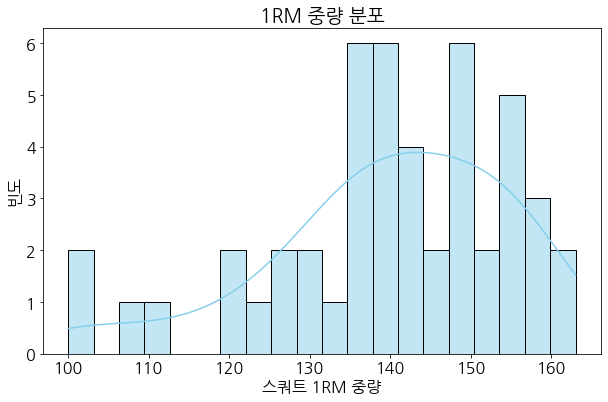

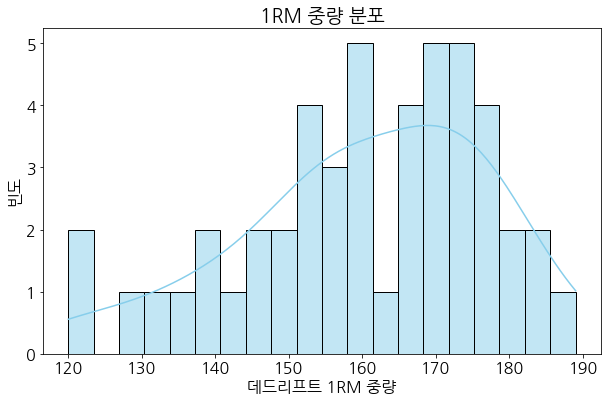

In [9]:
# 스쿼트 1RM 중량의 히스토그램 밀도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df['Squat(kg)'], bins=20, kde=True, color='skyblue')
plt.xlabel('스쿼트 1RM 중량')
plt.ylabel('빈도')
plt.title('1RM 중량 분포')
plt.show()

# 데드리프트 1RM 중량의 히스토그램 밀도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(df['Sumo_deadlift(kg)'], bins=20, kde=True, color='skyblue')
plt.xlabel('데드리프트 1RM 중량')
plt.ylabel('빈도')
plt.title('1RM 중량 분포')
plt.show()

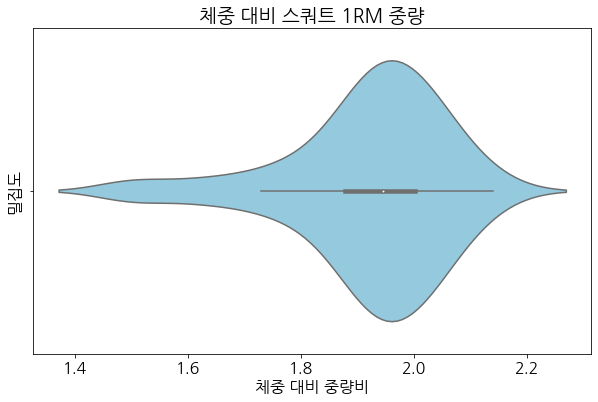

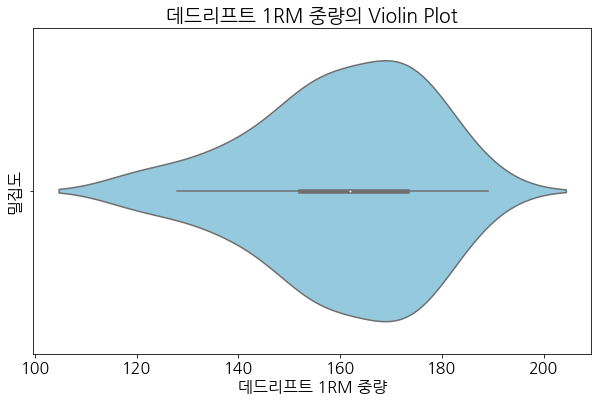

In [10]:
# Violin Plot 그리기
# 데이터 분포의 형태와 이상치를 확인하기 위해
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Squat_Weight_per_kg'], color='skyblue')
plt.xlabel('체중 대비 중량비')
plt.ylabel('밀집도')
plt.title('체중 대비 스쿼트 1RM 중량')
plt.show()

# Violin Plot 그리기
# 데이터 분포의 형태와 이상치를 확인하기 위해
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Sumo_deadlift(kg)'], color='skyblue')
plt.xlabel('데드리프트 1RM 중량')
plt.ylabel('밀집도')
plt.title('데드리프트 1RM 중량의 Violin Plot')
plt.show()

In [11]:
# 상관관계 분석 - 스쿼트

# 스쿼트 중량과 몸무게의 피어슨 상관계수 계산을 통해 유의성 확인
print('[스쿼트]', end='\n\n')
for x in ['Weight(kg)','Rest_Period(day)','Workout_time']: 
    if x == 'Weight(kg)':
        print('*몸무게와 스쿼트 1RM과의 상관관계*')
    elif x == 'Rest_Period(day)':
        print('*휴식기간과 스쿼트 1RM과의 상관관계*')
    else :
        print('*운동시간과 스쿼트 1RM과의 상관관계*')
    
    stats, pval = pearsonr(df[x],  df['Squat(kg)'])
    print(x+"와 상관계수:", round(stats,6))
    print(x+"의 p-value:", round(pval,20))

    alpha = 0.05

    if pval < alpha:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 있습니다.", end='\n\n')
    else:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 없습니다.", end='\n\n')
        
# 상관관계 분석 - 데드리프트

# 데드리프트와 몸무게의 피어슨 상관계수 계산을 통해 유의성 확인
print('[데드리프트]', end='\n\n')
for x in ['Weight(kg)','Rest_Period(day)','Workout_time']: 
    if x == 'Weight(kg)':
        print('*몸무게와 데드리프트 1RM과의 상관관계*')
    elif x == 'Rest_Period(day)':
        print('*휴식기간과 데드리프트 1RM과의 상관관계*')
    else :
        print('*운동시간과 데드리프트 1RM과의 상관관계*')
    stats, pval = pearsonr(df[x],  df['Sumo_deadlift(kg)'])
    print(x,"와 상관계수:", round(stats,6))
    print(x, "의p-value:", round(pval,4))

    alpha = 0.05

    if pval < alpha:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 있습니다.", end='\n\n')
    else:
        print(x+"과(와) 1RM 중량은 유의미한 상관관계가 없습니다.", end='\n\n')

[스쿼트]

*몸무게와 스쿼트 1RM과의 상관관계*
Weight(kg)와 상관계수: 0.870563
Weight(kg)의 p-value: 9.0833e-16
Weight(kg)과(와) 1RM 중량은 유의미한 상관관계가 있습니다.

*휴식기간과 스쿼트 1RM과의 상관관계*
Rest_Period(day)와 상관계수: 0.020517
Rest_Period(day)의 p-value: 0.8899112280805147
Rest_Period(day)과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

*운동시간과 스쿼트 1RM과의 상관관계*
Workout_time와 상관계수: 0.169228
Workout_time의 p-value: 0.25020137999162106
Workout_time과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

[데드리프트]

*몸무게와 데드리프트 1RM과의 상관관계*
Weight(kg) 와 상관계수: 0.849151
Weight(kg) 의p-value: 0.0
Weight(kg)과(와) 1RM 중량은 유의미한 상관관계가 있습니다.

*휴식기간과 데드리프트 1RM과의 상관관계*
Rest_Period(day) 와 상관계수: -0.032468
Rest_Period(day) 의p-value: 0.8266
Rest_Period(day)과(와) 1RM 중량은 유의미한 상관관계가 없습니다.

*운동시간과 데드리프트 1RM과의 상관관계*
Workout_time 와 상관계수: 0.136581
Workout_time 의p-value: 0.3546
Workout_time과(와) 1RM 중량은 유의미한 상관관계가 없습니다.



In [12]:
stats, pval = pearsonr(df['Weight(kg)'],  df['Squat(kg)'])
print("상관계수:", round(stats,4))
print("p-value:", round(pval,20))

상관계수: 0.8706
p-value: 9.0833e-16


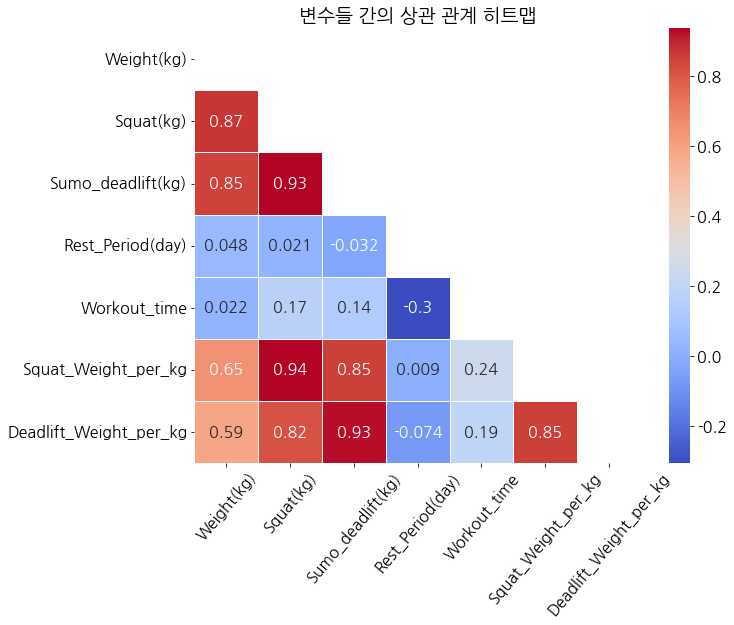

In [13]:
df2 = df.drop(['ID'], axis=1).copy()

# 상관 계수 행렬 계산
correlation_matrix = df2.corr()

# 중복데이터 제거를 위해 대각선 아래쪽 셀 가리기
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

# x축 레이블을 45도로 회전
plt.xticks(rotation=50)

plt.title('변수들 간의 상관 관계 히트맵')
plt.show()

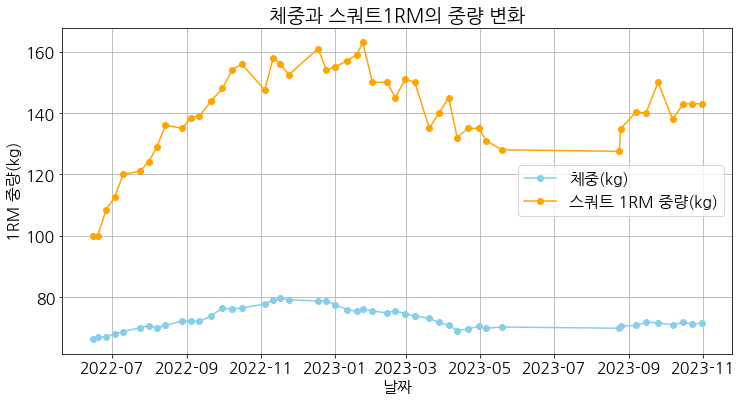

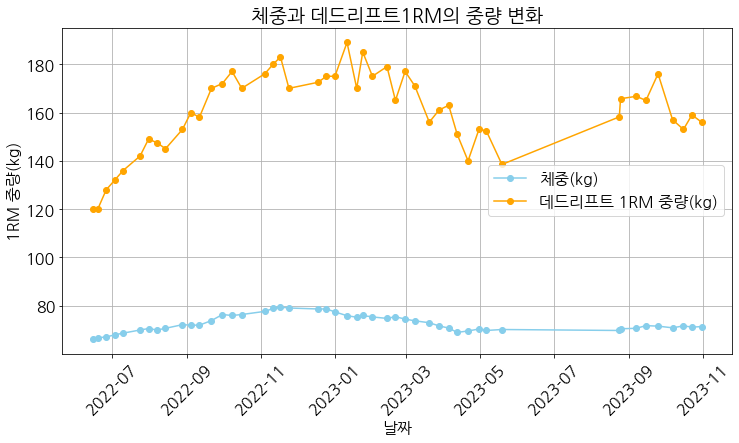

In [14]:
# 트렌드 그래프 그리기

#스쿼트
# 그래프 설정
plt.figure(figsize=(12, 6))

# 체중 그래프
plt.plot(df['DateTime'], df['Weight(kg)'], marker='o', linestyle='-', label='체중(kg)', color='skyblue')

# 체중 대비 스쿼트 1RM 중량 그래프
plt.plot(df['DateTime'], df['Squat(kg)'], marker='o', linestyle='-', label='스쿼트 1RM 중량(kg)', color='orange')

plt.xlabel('날짜')
plt.ylabel('1RM 중량(kg)')
plt.title('체중과 스쿼트1RM의 중량 변화')
plt.grid(True)  # 그리드 추가
plt.legend()  # 범례 표시
plt.show()

# 데드리프트
# 그래프 설정
plt.figure(figsize=(12, 6))

# 체중 그래프
plt.plot(df['DateTime'], df['Weight(kg)'], marker='o', linestyle='-', label='체중(kg)', color='skyblue')

# 체중 대비 스쿼트 1RM 중량 그래프
plt.plot(df['DateTime'], df['Sumo_deadlift(kg)'], marker='o', linestyle='-', label='데드리프트 1RM 중량(kg)', color='orange')

plt.xlabel('날짜')
plt.ylabel('1RM 중량(kg)')
plt.title('체중과 데드리프트1RM의 중량 변화')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.legend()  # 범례 표시
plt.show()

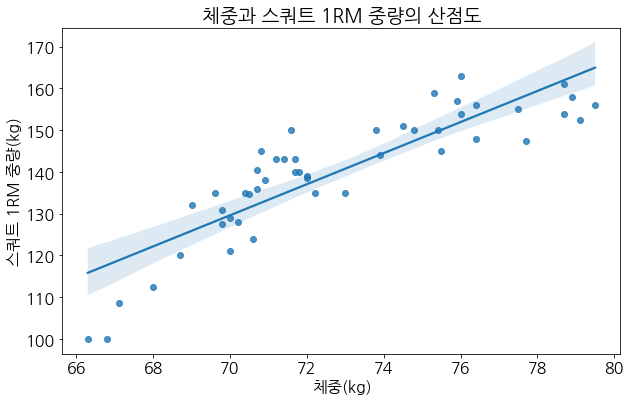

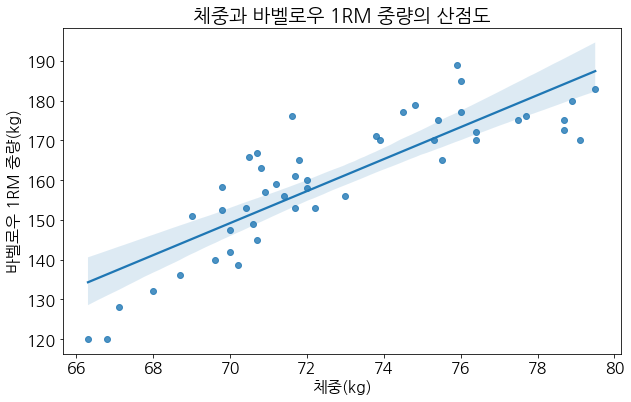

In [15]:
#몸무게와 스쿼트/데드리프트 중량의 시각화

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Weight(kg)', y='Squat(kg)')
plt.xlabel('체중(kg)')
plt.ylabel('스쿼트 1RM 중량(kg)')
plt.title('체중과 스쿼트 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Weight(kg)', y='Sumo_deadlift(kg)')
plt.xlabel('체중(kg)')
plt.ylabel('바벨로우 1RM 중량(kg)')
plt.title('체중과 바벨로우 1RM 중량의 산점도')
plt.show()

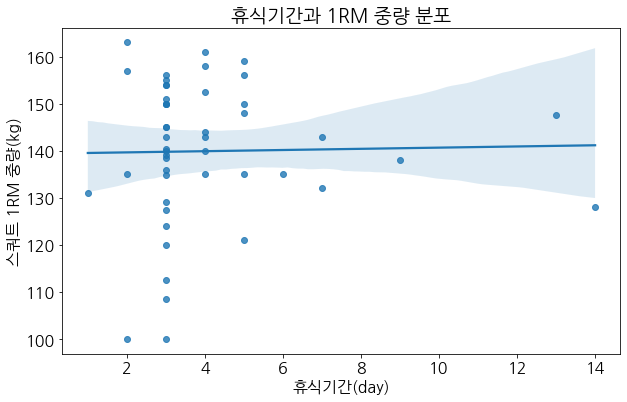

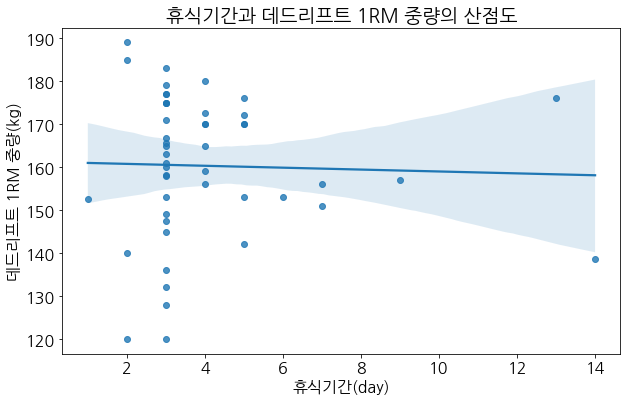

In [16]:
#휴식기간과 스쿼트/데드리프트 중량의 시각화

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Rest_Period(day)', y='Squat(kg)')
plt.xlabel('휴식기간(day)')
plt.ylabel('스쿼트 1RM 중량(kg)')
plt.title('휴식기간과 1RM 중량 분포')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Rest_Period(day)', y='Sumo_deadlift(kg)')
plt.xlabel('휴식기간(day)')
plt.ylabel('데드리프트 1RM 중량(kg)')
plt.title('휴식기간과 데드리프트 1RM 중량의 산점도')
plt.show()

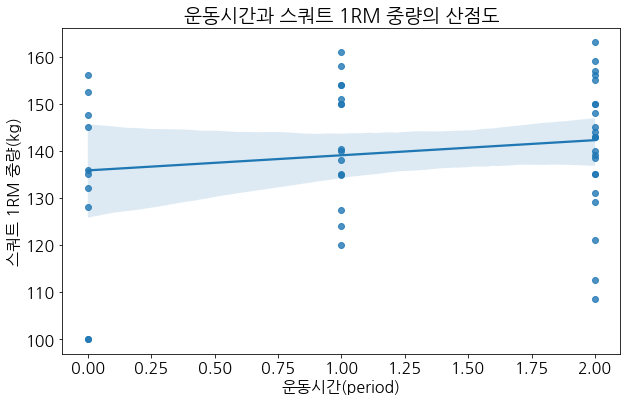

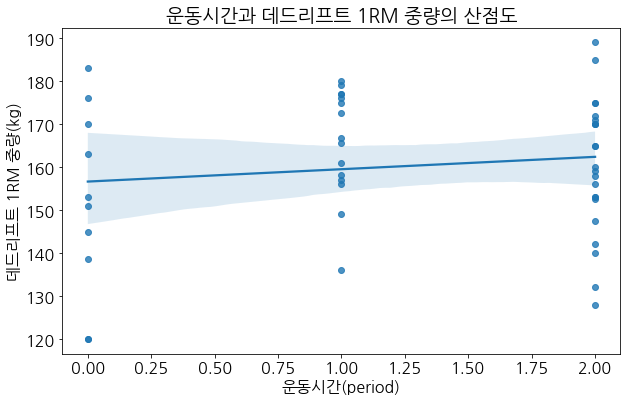

In [17]:
#휴식기간과 스쿼트/데드리프트 중량의 시각화
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Workout_time', y='Squat(kg)')
plt.xlabel('운동시간(period)')
plt.ylabel('스쿼트 1RM 중량(kg)')
plt.title('운동시간과 스쿼트 1RM 중량의 산점도')

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Workout_time', y='Sumo_deadlift(kg)')
plt.xlabel('운동시간(period)')
plt.ylabel('데드리프트 1RM 중량(kg)')
plt.title('운동시간과 데드리프트 1RM 중량의 산점도')
plt.show()

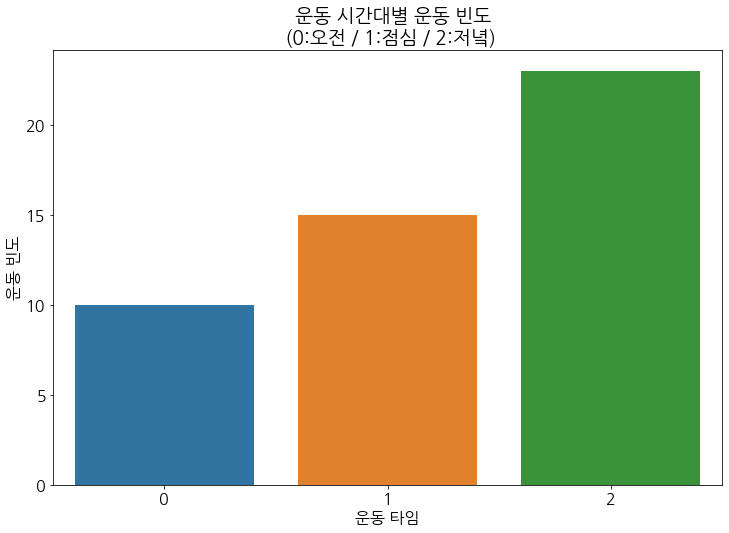

In [18]:
# 운동 시간대별 운동 빈도 분석
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Workout_time')
plt.xlabel('운동 타임')
plt.ylabel('운동 빈도')
plt.title('''   운동 시간대별 운동 빈도 
 (0:오전 / 1:점심 / 2:저녘)''')
plt.show()

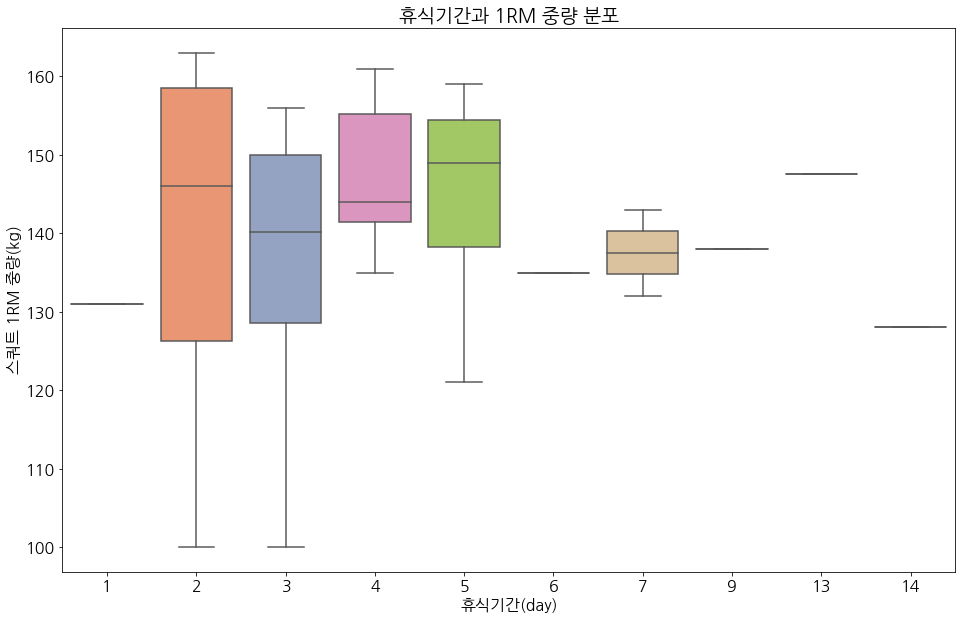

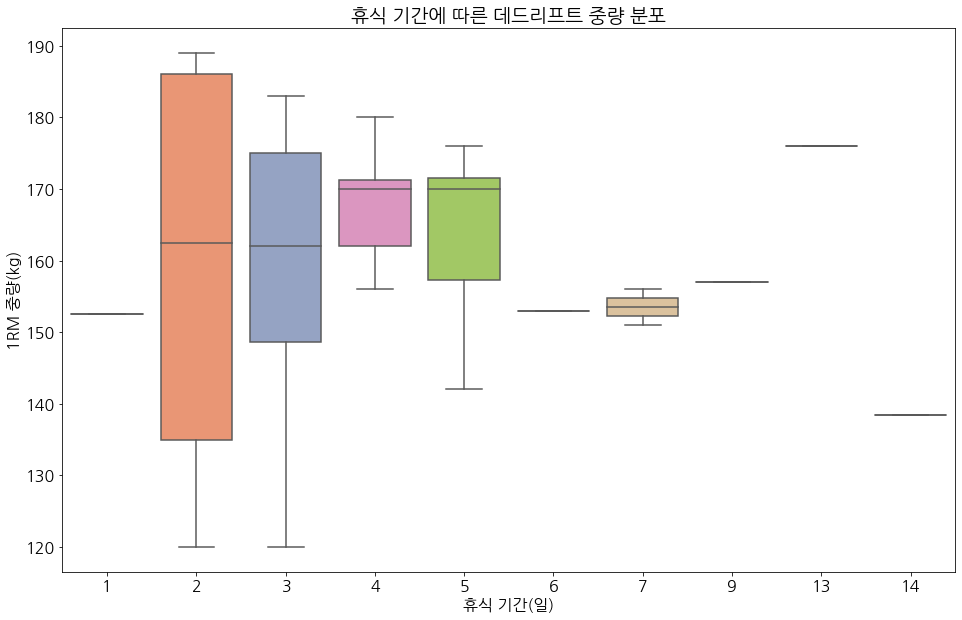

In [19]:
# 휴식 기간에 따른 1RM 중량 분포 시각화
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Rest_Period(day)', y='Squat(kg)', palette='Set2')
plt.xlabel('휴식기간(day)')
plt.ylabel('스쿼트 1RM 중량(kg)')
plt.title('휴식기간과 1RM 중량 분포')

plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Rest_Period(day)', y='Sumo_deadlift(kg)',  palette='Set2')
plt.xlabel('휴식 기간(일)')
plt.ylabel('1RM 중량(kg)')
plt.title('휴식 기간에 따른 데드리프트 중량 분포')

plt.show()